In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
# Set directory paths
train_dir = 'train'
valid_dir = 'valid'
IMG_SIZE = 128

In [3]:
# Function to load images and labels
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    
    for idx, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Failed to load {img_path}")
                    continue
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img.flatten())
                labels.append(idx)
    
    return np.array(images), np.array(labels), class_names

In [ ]:
# Load training data
X_train, y_train, class_names = load_images_from_directory(train_dir)
# Load validation data
X_valid, y_valid, _ = load_images_from_directory(valid_dir)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [6]:
# Train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
# Save the model
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(decision_tree, model_file)


In [9]:
from sklearn.metrics import accuracy_score


Accuracy: 28.06%
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.28      0.30      0.29       504
                                 Apple___Black_rot       0.36      0.32      0.34       497
                          Apple___Cedar_apple_rust       0.29      0.36      0.32       440
                                   Apple___healthy       0.19      0.20      0.19       502
                               Blueberry___healthy       0.29      0.26      0.27       454
                 Cherry_(including_sour)___healthy       0.41      0.42      0.41       456
          Cherry_(including_sour)___Powdery_mildew       0.17      0.18      0.17       421
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.31      0.29      0.30       410
                       Corn_(maize)___Common_rust_       0.95      0.94      0.95       477
                            Corn_(maize)___healthy       0.43 

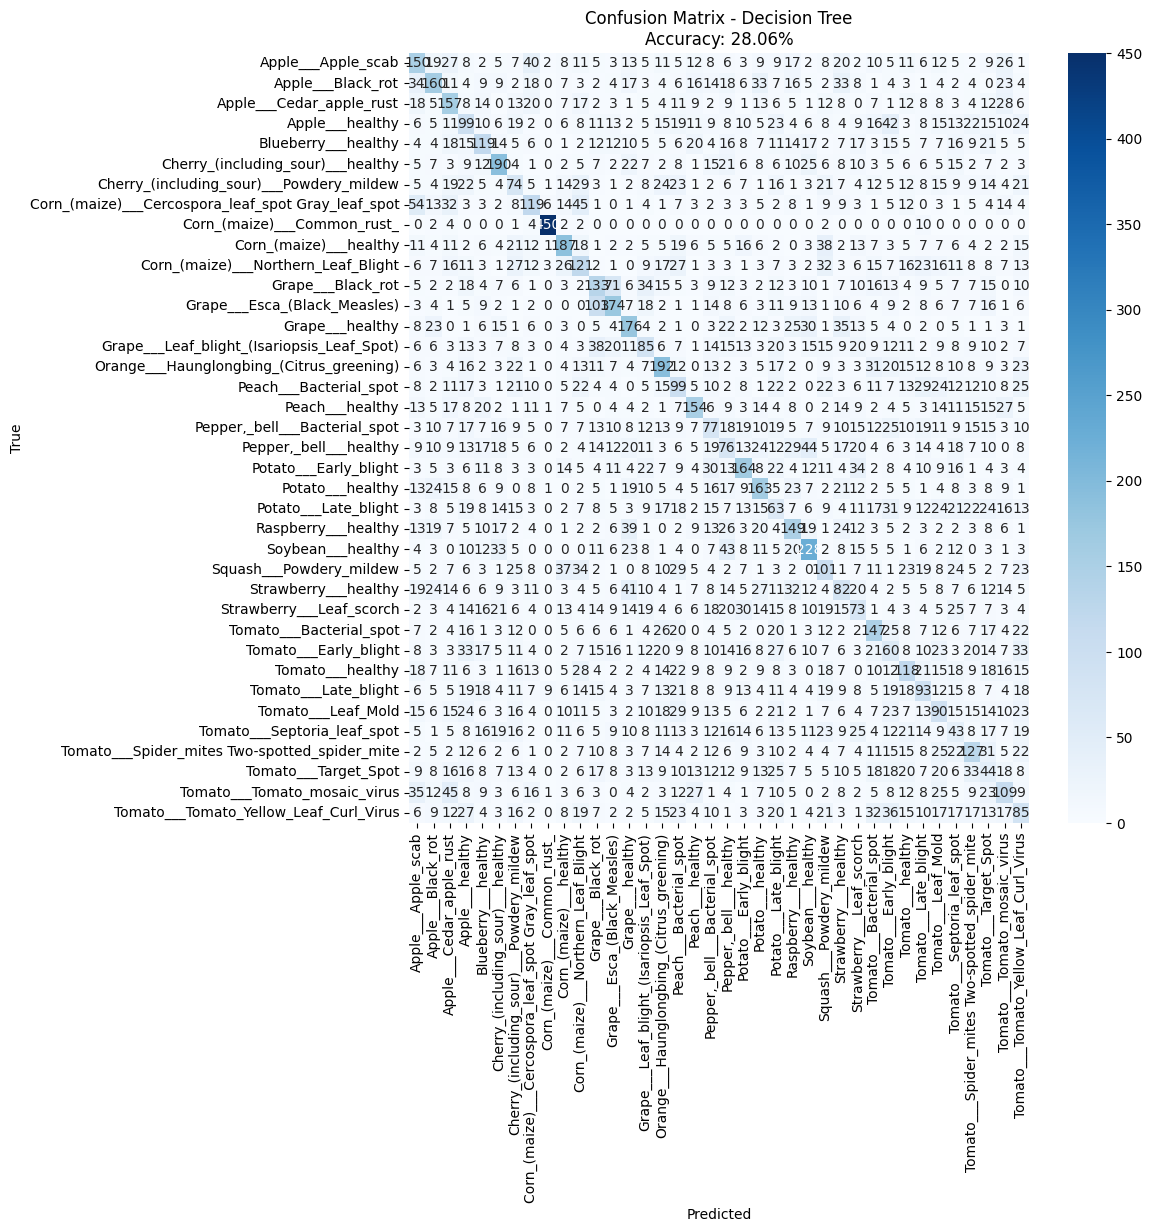

In [10]:
# Evaluate the model on the validation set
y_pred = decision_tree.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Generate classification report
report = classification_report(y_valid, y_pred, target_names=class_names)
print(report)

# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Decision Tree\nAccuracy: {accuracy:.2f}%')
plt.show()


In [ ]:
# Accuracy graph (train vs validation)

# Predict on training set to calculate training accuracy
y_train_pred = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Create a list of accuracies for plotting
accuracies = [train_accuracy, accuracy]
labels = ['Training Accuracy', 'Validation Accuracy']

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: Training vs Validation')
plt.show()
